In [11]:
from itertools import count
from nltk.util import pr
import pandas as pd

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("user_reviews.csv")
data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
data.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [7]:
data.shape

(64295, 5)

In [8]:
data = data.dropna()
data.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [10]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Translated_Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Translated_Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Translated_Review"]]
data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Positive,Negative,Neutral
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.534,0.0,0.466
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.519,0.0,0.481
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.451,0.0,0.549
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.677,0.0,0.323
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,0.808,0.0,0.192


D:\Anaconda3\envs\sd_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


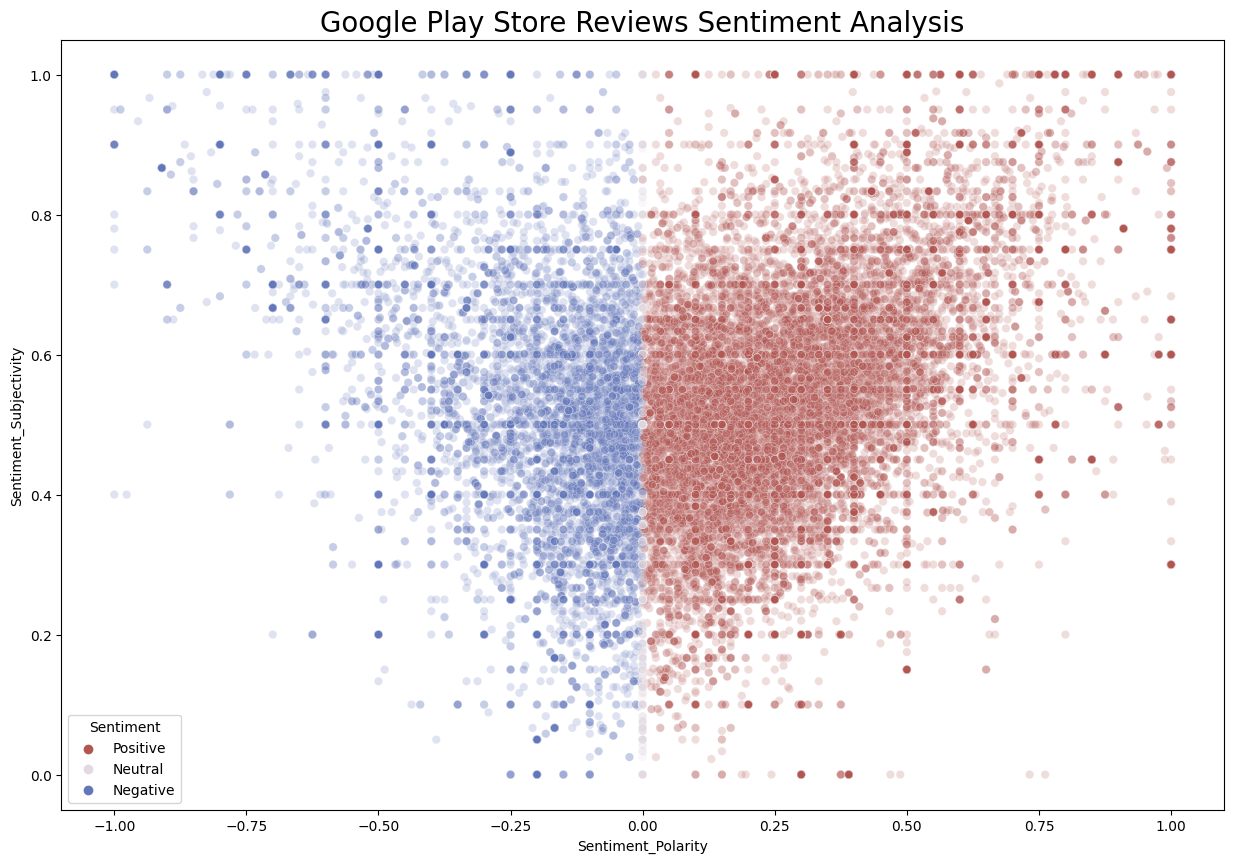

In [14]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data['Sentiment_Polarity'], data['Sentiment_Subjectivity'], 
                hue = data['Sentiment'], edgecolor='white', palette="twilight_shifted_r", alpha=0.2)
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()